<a href="https://colab.research.google.com/github/ranpei97/E4511-2021-Pei/blob/main/Data_Clean_Merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

TensorFlow 1.x selected.
--2021-04-08 05:24:54--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   158MB/s    in 3.3s    

2021-04-08 05:24:57 (155 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


InvalidVersionSpec: Invalid version '4.19.112+': empty version component


real	0m12.190s
user	0m8.537s
sys	0m1.927s
--2021-04-08 05:33:03--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]   1.07

In [6]:
#!pip install molvs
#!pip install bravado
#!pip install umap

  Created wheel for umap: filename=umap-0.1.1-cp37-none-any.whl size=3568 sha256=9b9b5b5d06fc8502bd702b3927a42b99b7e635b5550f92057228e553187a1344
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94ccac26
Successfully built umap


In [66]:
import warnings
warnings.filterwarnings('ignore')

import json
import os
import requests

# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

import matplotlib_venn as mpv
from rdkit import Chem
from matplotlib import pyplot as plt

In [37]:
! wget https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_ChEMBL_SMILES.csv
! wget https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_DTC_SMILES.csv
! wget https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_Excape_SMILES.csv

--2021-04-08 06:19:33--  https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_ChEMBL_SMILES.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1043738 (1019K) [text/plain]
Saving to: ‘HTR2A_ChEMBL_SMILES.csv.3’

HTR2A_ChEMBL_SMILES 100%[===================>]   1019K  --.-KB/s    in 0.1s    

2021-04-08 06:19:34 (6.85 MB/s) - ‘HTR2A_ChEMBL_SMILES.csv.3’ saved [1043738/1043738]

--2021-04-08 06:19:34--  https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_DTC_SMILES.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

In [22]:
chembl = pd.read_csv('HTR2A_ChEMBL_SMILES.csv', header = 0)
chembl=chembl.drop(columns=chembl.iloc[:,0:1])
chembl

,Molecule_ChEMBL_ID,Molecule_Name,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Compound_Key,Smiles,Standard_Type,Standard_Relation,Standard_Value,Standard_Units,pChEMBL_Value,Data_Validity_Comment,Comment,Uo_Units,Ligand_Efficiency_BEI,Ligand_Efficiency_LE,Ligand_Efficiency_LLE,Ligand_Efficiency_SEI,Potential_Duplicate,Assay_ChEMBL_ID,Assay_Description,Assay_Type,BAO_Format_ID,BAO_Label,Assay_Organism,Assay_Tissue_ChEMBL_ID,Assay_Tissue_Name,Assay_Cell_Type,Assay_Subcellular_Fraction,Assay_Parameters,Assay_Variant_Accession,Assay_Variant_Mutation,Target_ChEMBL_ID,Target_Name,Target_Organism,Target_Type,Document_ChEMBL_ID,Source_ID,Source_Description,Document_Journal,Document_Year,Cell_ChEMBL_ID,Properties,Standard_Value_nM,base_rdkit_smiles
0,CHEMBL4285839,NaN,0.0,437.54,0.0,2.17,3h,O=C1[C@H]2[C@@H]3C=C[C@@H](C3)[C@H]2C(=O)N1CCC...,IC50,'=',854.000,nM,6.07,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,854.000,O=C1[C@H]2[C@@H]3C=C[C@@H](C3)[C@H]2C(=O)N1CCC...
1,CHEMBL4283546,NaN,0.0,425.60,0.0,3.98,3q,O=C1C2CCCCC2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,IC50,'=',34.000,nM,7.47,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,34.000,O=C1C2CCCCC2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1
2,CHEMBL3264204,NaN,0.0,448.44,0.0,4.52,"2, TG6-10-1",COc1cc(/C=C/C(=O)NCCn2c(C(F)(F)F)cc3ccccc32)cc...,IC50,'=',75000.000,nM,4.12,NaN,NaN,UO_0000065,9.20,0.18,-0.40,6.68,False,CHEMBL3293197,Inhibition of 5HT2A receptor (unknown origin),B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3286257,1,Scientific Literature,Eur. J. Med. Chem.,2014.0,NaN,NaN,75000.000,COc1cc(/C=C/C(=O)NCCn2c(C(F)(F)F)cc3ccccc32)cc...
3,CHEMBL4294797,NaN,0.0,419.55,0.0,4.10,8a,O=C1c2ccccc2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,IC50,'=',683.000,nM,6.17,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,683.000,O=C1c2ccccc2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1
4,CHEMBL51,KETANSERIN,4.0,395.43,0.0,2.42,Ketanserin,O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=...,IC50,'=',0.900,nM,9.05,NaN,NaN,UO_0000065,22.88,0.43,6.63,12.03,False,CHEMBL2394909,Binding affinity to human 5-HT2A receptor by r...,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL2390830,1,Scientific Literature,Eur. J. Med. Chem.,2013.0,NaN,NaN,0.900,O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,CHEMBL4279645,NaN,0.0,469.61,0.0,1.78,4b,O=C1[C@@H]2[C@H](C(=O)N1CCCCN1CCN(c3cccc4sccc3...,IC50,'=',81.500,nM,7.09,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,81.500,O=C1[C@@H]2[C@H](C(=O)N1CCCCN1CCN(c3cccc4sccc3...
1830,CHEMBL4228313,NaN,0.0,472.56,0.0,4.53,4,COc1c(OCCOCCN=[N+]=[N-])cccc1[C@H](O)C1CCN

In [26]:
chembl['pChEMBL_Value_nM'] = -np.log10(chembl.Standard_Value_nM/1000000000)

In [27]:
chembl.head()

,Molecule_ChEMBL_ID,Molecule_Name,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Compound_Key,Smiles,Standard_Type,Standard_Relation,Standard_Value,Standard_Units,pChEMBL_Value,Data_Validity_Comment,Comment,Uo_Units,Ligand_Efficiency_BEI,Ligand_Efficiency_LE,Ligand_Efficiency_LLE,Ligand_Efficiency_SEI,Potential_Duplicate,Assay_ChEMBL_ID,Assay_Description,Assay_Type,BAO_Format_ID,BAO_Label,Assay_Organism,Assay_Tissue_ChEMBL_ID,Assay_Tissue_Name,Assay_Cell_Type,Assay_Subcellular_Fraction,Assay_Parameters,Assay_Variant_Accession,Assay_Variant_Mutation,Target_ChEMBL_ID,Target_Name,Target_Organism,Target_Type,Document_ChEMBL_ID,Source_ID,Source_Description,Document_Journal,Document_Year,Cell_ChEMBL_ID,Properties,Standard_Value_nM,base_rdkit_smiles,pChEMBL_Value_nM
0,CHEMBL4285839,NaN,0.0,437.54,0.0,2.17,3h,O=C1[C@H]2[C@@H]3C=C[C@@H](C3)[C@H]2C(=O)N1CCC...,IC50,'=',854.0,nM,6.07,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,854.0,O=C1[C@H]2[C@@H]3C=C[C@@H](C3)[C@H]2C(=O)N1CCC...,6.068542
1,CHEMBL4283546,NaN,0.0,425.60,0.0,3.98,3q,O=C1C2CCCCC2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,IC50,'=',34.0,nM,7.47,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,34.0,O=C1C2CCCCC2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,7.468521
2,CHEMBL3264204,NaN,0.0,448.44,0.0,4.52,"2, TG6-10-1",COc1cc(/C=C/C(=O)NCCn2c(C(F)(F)F)cc3ccccc32)cc...,IC50,'=',75000.0,nM,4.12,NaN,NaN,UO_0000065,9.20,0.18,-0.40,6.68,False,CHEMBL3293197,Inhibition of 5HT2A receptor (unknown origin),B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3286257,1,Scientific Literature,Eur. J. Med. Chem.,2014.0,NaN,NaN,75000.0,COc1cc(/C=C/C(=O)NCCn2c(C(F)(F)F)cc3ccccc32)cc...,4.124939
3,CHEMBL4294797,NaN,0.0,419.55,0.0,4.10,8a,O=C1c2ccccc2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,IC50,'=',683.0,nM,6.17,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,683.0,O=C1c2ccccc2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,6.165579
4,CHEMBL51,KETANSERIN,4.0,395.43,0.0,2.42,Ketanserin,O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=...,IC50,'=',0.9,nM,9.05,NaN,NaN,UO_0000065,22.88,0.43,6.63,12.03,False,CHEMBL2394909,Binding affinity to human 5-HT2A receptor by r...,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL2390830,1,Scientific Literature,Eur. J. Med. Chem.,2013.0,NaN,NaN,0.9,O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=...,9.045757


In [31]:
# drop NA pIC50's & smiles
chembl=chembl.dropna(axis=0, subset = ['pChEMBL_Value_nM','base_rdkit_smiles'])
print(chembl.shape)

(1084, 48)


In [32]:
chembl.Standard_Relation.unique()

array(["'='", "'>'", "'<'"], dtype=object)

In [33]:
# flip arrows and fix punctuation for relation column to reflect pValues not normal values
chembl['pRelation'] = chembl.Standard_Relation
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'<'", ">", chembl.pRelation)
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'>'", "<", chembl.pRelation)
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'='", "=", chembl.pRelation)
chembl[['Standard_Relation', 'pRelation']].head()

,Standard_Relation,pRelation
0,'=',=
1,'=',=
2,'=',=
3,'=',=
4,'=',=


In [34]:
thresh=-np.log10(100/1000000000) # pIC50 of 100nM for threshold

In [35]:
print(chembl.shape)
chembl_cur = curate_data.aggregate_assay_data(chembl, value_col = 'pChEMBL_Value_nM', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Molecule_ChEMBL_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)
print(chembl_cur.shape)
chembl_cur.head()

(1084, 49)
0 entries in input table are missing SMILES strings
988 unique SMILES strings are reduced to 988 unique base SMILES strings
(988, 5)


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL161780,CNS(=O)(=O)Cc1ccc2[nH]cc(CCN3CC[C@@H](CNCc4ccc...,,5.236572,0
1,CHEMBL1852587,Cc1cccc(N2CCN(CCCNC(=O)c3nc(C)n(CC(C)C)c3C)CC2...,,6.663740,0
2,CHEMBL1852779,COc1cc(OC)cc(-n2c(C)nc(C(=O)NCCCN3CCN(c4cccc(C...,,7.494850,1
3,CHEMBL2393275,Fc1ccc(Nc2nc(N3CCN(Cc4ccccc4)CC3)nc3[nH]ncc23)cc1,,7.282329,1
4,CHEMBL414668,C1=C(c2c(-c3ccccc3)[nH]c3ccccc23)CCNC1,,7.301030,1


In [46]:
chembl_cur.to_csv("HTR2A_ChEMBL_SMILES_Cleaned.csv")

## DTC

In [38]:
# select pIC50 values
dtc = pd.read_csv('HTR2A_DTC_SMILES.csv', header = 0)

vals = ['EC50', 'IC50', 'PIC50']
print(dtc.shape)
dtc=dtc[dtc.End_Point_Standard_Type.isin(vals)]
print(dtc.shape)


(1826, 47)
(1826, 47)


In [43]:
# flip arrows for relation column to reflect pValues not normal values
dtc['pRelation'] = dtc.End_Point_Standard_Relation
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == "<", ">", dtc.pRelation)
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == ">", "<", dtc.pRelation)
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == "=", "=", dtc.pRelation)
print(dtc.pRelation.unique())
display(dtc[['End_Point_Standard_Relation', 'pRelation']].head())

['=' '<' '>']


,End_Point_Standard_Relation,pRelation
9,=,=
18,=,=
28,=,=
29,=,=
30,=,=


In [41]:
dtc=dtc.dropna(axis=0, subset = ['pDTC_Value','base_rdkit_smiles'])
print(dtc.shape)

(1074, 48)


In [47]:
# aggregate duplicates
dtc_cur = curate_data.aggregate_assay_data(dtc, value_col = 'pDTC_Value', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Compound_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)
dtc_cur.to_csv("HTR2A_DTC_SMILES_Cleaned.csv")
print(dtc_cur.shape)
print(dtc_cur.relation.unique())
dtc_cur.head()

0 entries in input table are missing SMILES strings
874 unique SMILES strings are reduced to 874 unique base SMILES strings
(874, 5)
['' '<' '>']


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL161780,CNS(=O)(=O)Cc1ccc2[nH]cc(CCN3CC[C@@H](CNCc4ccc...,,5.236572,0
1,CHEMBL1852587,Cc1cccc(N2CCN(CCCNC(=O)c3nc(C)n(CC(C)C)c3C)CC2...,,6.246246,0
2,CHEMBL1852779,COc1cc(OC)cc(-n2c(C)nc(C(=O)NCCCN3CCN(c4cccc(C...,,7.320788,1
3,CHEMBL2393275,Fc1ccc(Nc2nc(N3CCN(Cc4ccccc4)CC3)nc3[nH]ncc23)cc1,,7.282329,1
4,CHEMBL414668,C1=C(c2c(-c3ccccc3)[nH]c3ccccc23)CCNC1,,7.301030,1


## Excape

In [48]:
excape = pd.read_csv('HTR2A_Excape_SMILES.csv', header = 0)

# excape: has no relation col, so create one with all ''
excape['pRelation']=''
print(excape.shape)
print(excape.pRelation.unique())
excape=excape.dropna(axis=0, subset = ['pXC50','base_rdkit_smiles'])
print(excape.shape)
# aggregate duplicates
excape_cur = curate_data.aggregate_assay_data(excape, value_col = 'pXC50', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Original_Entry_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)
excape_cur.to_csv("HTR2A_Excape_SMILES_Cleaned.csv")
print(excape_cur.shape)
print(excape_cur.relation.unique())
excape_cur.head()

(2604, 14)
['']
(2558, 14)
0 entries in input table are missing SMILES strings
2557 unique SMILES strings are reduced to 2554 unique base SMILES strings
(2554, 5)
['']


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL414628,COc1ccc(S(=O)(=O)N2CCc3ccc(I)cc32)cc1N1CCNCC1,,5.40000,0
1,54577018,Cc1cccc(N2CCN(CCCNC(=O)c3nc(C)n(CC(C)C)c3C)CC2...,,6.66394,0
2,73355008,Fc1ccc(Nc2nc(N3CCN(Cc4ccccc4)CC3)nc3[nH]ncc23)cc1,,7.28233,1
3,10826203,C1=C(c2c(-c3ccccc3)[nH]c3ccccc23)CCNC1,,7.30103,1
4,25069125,Oc1[nH]cc2ccc(OCCCCN3CCN(c4cccc5c4CCO5)CC3)cc12,,7.27246,1


## Merge

In [49]:
dtc_cur['datasource']='dtc'
excape_cur['datasource']='excape'
HTR2A = pd.concat([chembl_cur, dtc_cur, excape_cur])
HTR2A.to_csv("HTR2A_merge.csv")
print(HTR2A.shape)

(4416, 6)


In [52]:

import importlib
importlib.reload(curate_data)
HTR2A_cur = curate_data.aggregate_assay_data(HTR2A, value_col = 'pXC50', 
                                              id_col = 'compound_id', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'relation',
                                              active_thresh=thresh)

print(HTR2A_cur.shape)
print(HTR2A.relation.unique())
HTR2A_cur.head()

0 entries in input table are missing SMILES strings
2922 unique SMILES strings are reduced to 2922 unique base SMILES strings
(2922, 5)
['' '<' '>']


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,54577018,Cc1cccc(N2CCN(CCCNC(=O)c3nc(C)n(CC(C)C)c3C)CC2...,,6.524642,0
1,CHEMBL414628,COc1ccc(S(=O)(=O)N2CCc3ccc(I)cc32)cc1N1CCNCC1,,5.400000,0
2,73355008,Fc1ccc(Nc2nc(N3CCN(Cc4ccccc4)CC3)nc3[nH]ncc23)cc1,,7.282330,1
3,10826203,C1=C(c2c(-c3ccccc3)[nH]c3ccccc23)CCNC1,,7.301030,1
4,25069125,Oc1[nH]cc2ccc(OCCCCN3CCN(c4cccc5c4CCO5)CC3)cc12,,7.272460,1


In [53]:
HTR2A_cur.relation.unique()

array(['', '<'], dtype=object)

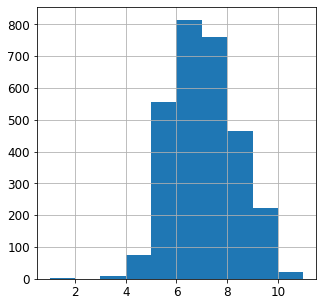

In [54]:
HTR2A_cur.pXC50.hist(figsize=(5,5));

In [55]:
HTR2A_cur.active.sum()

1455

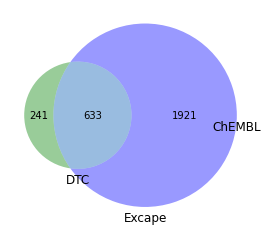

In [61]:
mpv.venn3([set(HTR2A.loc[HTR2A.datasource=='chembl','base_rdkit_smiles']),
           set(HTR2A.loc[HTR2A.datasource=='dtc','base_rdkit_smiles']),
           set(HTR2A.loc[HTR2A.datasource=='excape','base_rdkit_smiles']),],
          set_labels = ['ChEMBL','DTC','Excape']);

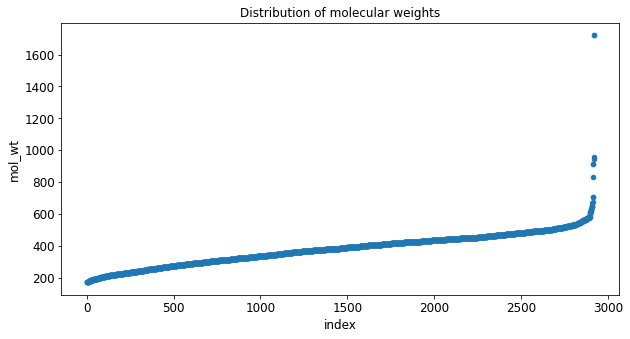

In [67]:

HTR2A_cur["mol_wt"] = [Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smile)) for smile in HTR2A_cur["base_rdkit_smiles"]]
HTR2A_cur = HTR2A_cur.sort_values('mol_wt')
HTR2A_cur=HTR2A_cur.reset_index(drop=True)
HTR2A_cur=HTR2A_cur.reset_index() # plot x axis as index #'s
fig,ax=plt.subplots(figsize=(10,5))
HTR2A_cur.plot(kind='scatter', x='index', y='mol_wt', ax=ax);
plt.title("Distribution of molecular weights");

In [68]:
print(HTR2A_cur.shape)
HTR2A_cur = HTR2A_cur[HTR2A_cur.mol_wt <1400]
print(HTR2A_cur.shape)

(2922, 8)
(2920, 8)


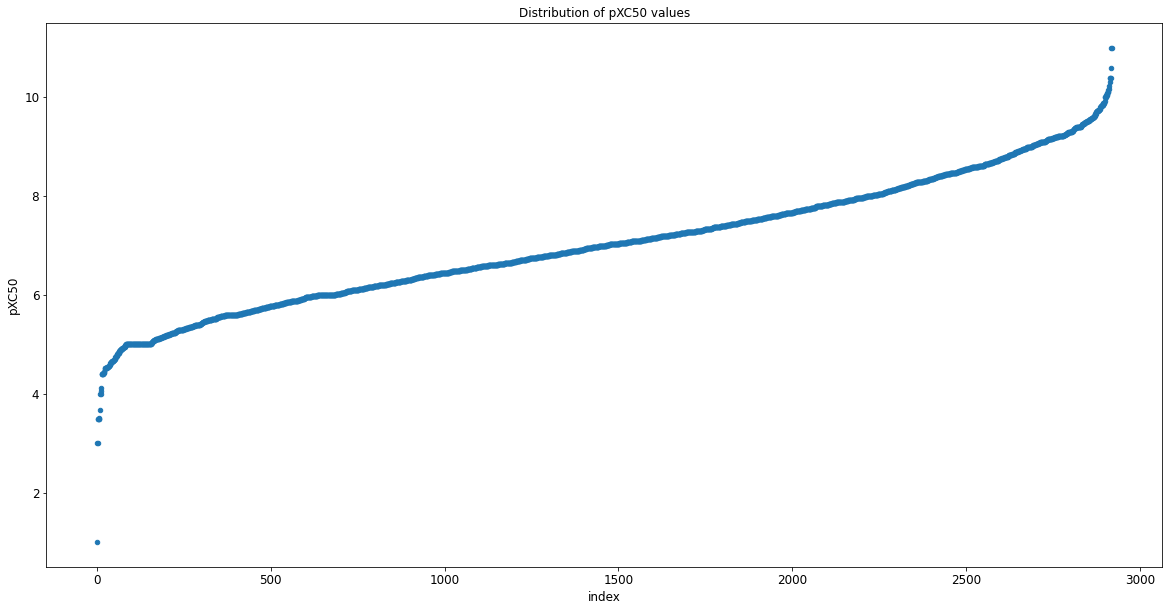

In [69]:
HTR2A_cur=HTR2A_cur.drop(columns=['index'])
HTR2A_cur = HTR2A_cur.sort_values('pXC50')
HTR2A_cur = HTR2A_cur.reset_index(drop=True)
HTR2A_cur = HTR2A_cur.reset_index() # plot x axis as index #'s
fig,ax=plt.subplots(figsize=(20,10))
HTR2A_cur.plot(kind='scatter', x='index', y='pXC50', ax=ax);
plt.title("Distribution of pXC50 values");


In [71]:
print(HTR2A_cur.shape)
HTR2A_cur=HTR2A_cur[HTR2A_cur.pXC50>3]
HTR2A_cur=HTR2A_cur[HTR2A_cur.pXC50<14]
print(HTR2A_cur.shape)

(2920, 8)
(2917, 8)


In [72]:
for col in HTR2A_cur.columns:
  print(col, HTR2A_cur[col].isna().values.any())

index False
level_0 False
compound_id True
base_rdkit_smiles False
relation False
pXC50 False
active False
mol_wt False


In [74]:
HTR2A_cur.to_csv("HTR2A_cur.csv")